In [3]:
from google.colab import files
uploaded = files.upload()

Saving customer_dataset_modelo.csv to customer_dataset_modelo.csv


In [4]:
import pandas as pd

df = pd.read_csv('customer_dataset_modelo.csv')
df.head()

,cliente_id,genero,edad,pais,ciudad,segmento_de_cliente,meses_permanencia,canal_de_registro,tipo_contrato,conecciones_mensuales,...,tiempo_promedio_de_resolucion,tipo_de_queja,puntuacion_csates,escaladas,tasa_apertura_email,puntuacion_nps,respuesta_de_la_encuesta,Estado_de_Conexion,Permanencia_Corta,abandonar
0,cust00001,masculino,68,uk,londres,sme,19,web,mensual,12,...,13.35,facturacion,4.0,0,0.81,6.0,satisfecho,en riesgo,0,0
1,cust00002,femenino,57,australia,sydney,individual,2,mobile,mensual,2,...,25.14,facturacion,2.0,0,0.01,3.0,insatisfecho,inactivo,1,1
2,cust00003,masculino,24,us,new york,sme,58,web,anual,19,...,27.57,facturacion,3.0,0,0.35,5.0,neutral,en riesgo,0,0
3,cust00004,masculino,49,banglades,dhaka,individual,37,mobile,anual,15,...,26.42,tecnico,5.0,1,0.85,10.0,muy satisfecho,activo,0,0
4,cust00005,masculino,65,india,delhi,individual,29,web,mensual,15,...,26.67,Sin queja,4.0,0,0.86,6.0,satisfecho,en riesgo,0,0


 Naturaleza del Dataset
Es un conjunto de datos de clientes de telecomunicaciones o servicios, con información sobre:

Datos demográficos (género, edad, ubicación)

Comportamiento de uso

Experiencia con servicio al cliente

Indicadores de retención/abandono

2. Variables Clave Identificadas
Variables demográficas: genero, edad, pais, ciudad

Variables de contrato: segmento_de_cliente, tipo_contrato, meses_permanencia

Variables de uso: conecciones_mensuales

Variables de servicio al cliente: tiempo_promedio_de_resolucion, tipo_de_queja, escaladas

Variables de satisfacción: puntuacion_csates, puntuacion_nps, respuesta_de_la_encuesta

Variables de comportamiento: tasa_apertura_email

Variables objetivo: Estado_de_Conexion, Permanencia_Corta, abandonar



In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 32 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   cliente_id                     10000 non-null  object 
 1   genero                         10000 non-null  object 
 2   edad                           10000 non-null  int64  
 3   pais                           10000 non-null  object 
 4   ciudad                         10000 non-null  object 
 5   segmento_de_cliente            10000 non-null  object 
 6   meses_permanencia              10000 non-null  int64  
 7   canal_de_registro              10000 non-null  object 
 8   tipo_contrato                  10000 non-null  object 
 9   conecciones_mensuales          10000 non-null  int64  
 10  dias_activos_semanales         10000 non-null  int64  
 11  promedio_coneccion             10000 non-null  float64
 12  caracteristicas_usadas         10000 non-null  

Estructura General del Dataset
10,000 clientes - tamaño robusto para análisis estadístico

32 variables - buen balance entre datos demográficos, comportamiento y métricas de negocio

Sin valores nulos - dataset limpio, listo para análisis

2.4+ MB - tamaño manejable
11 variables categóricas en total (object)
21 Variables Numéricas
15 enteros (int64): principalmente conteos (errores, tickets, conexiones)

6 decimales (float64): métricas continuas (promedios, tasas, puntuaciones)

KeyError: 'tasa_clics_marketing'

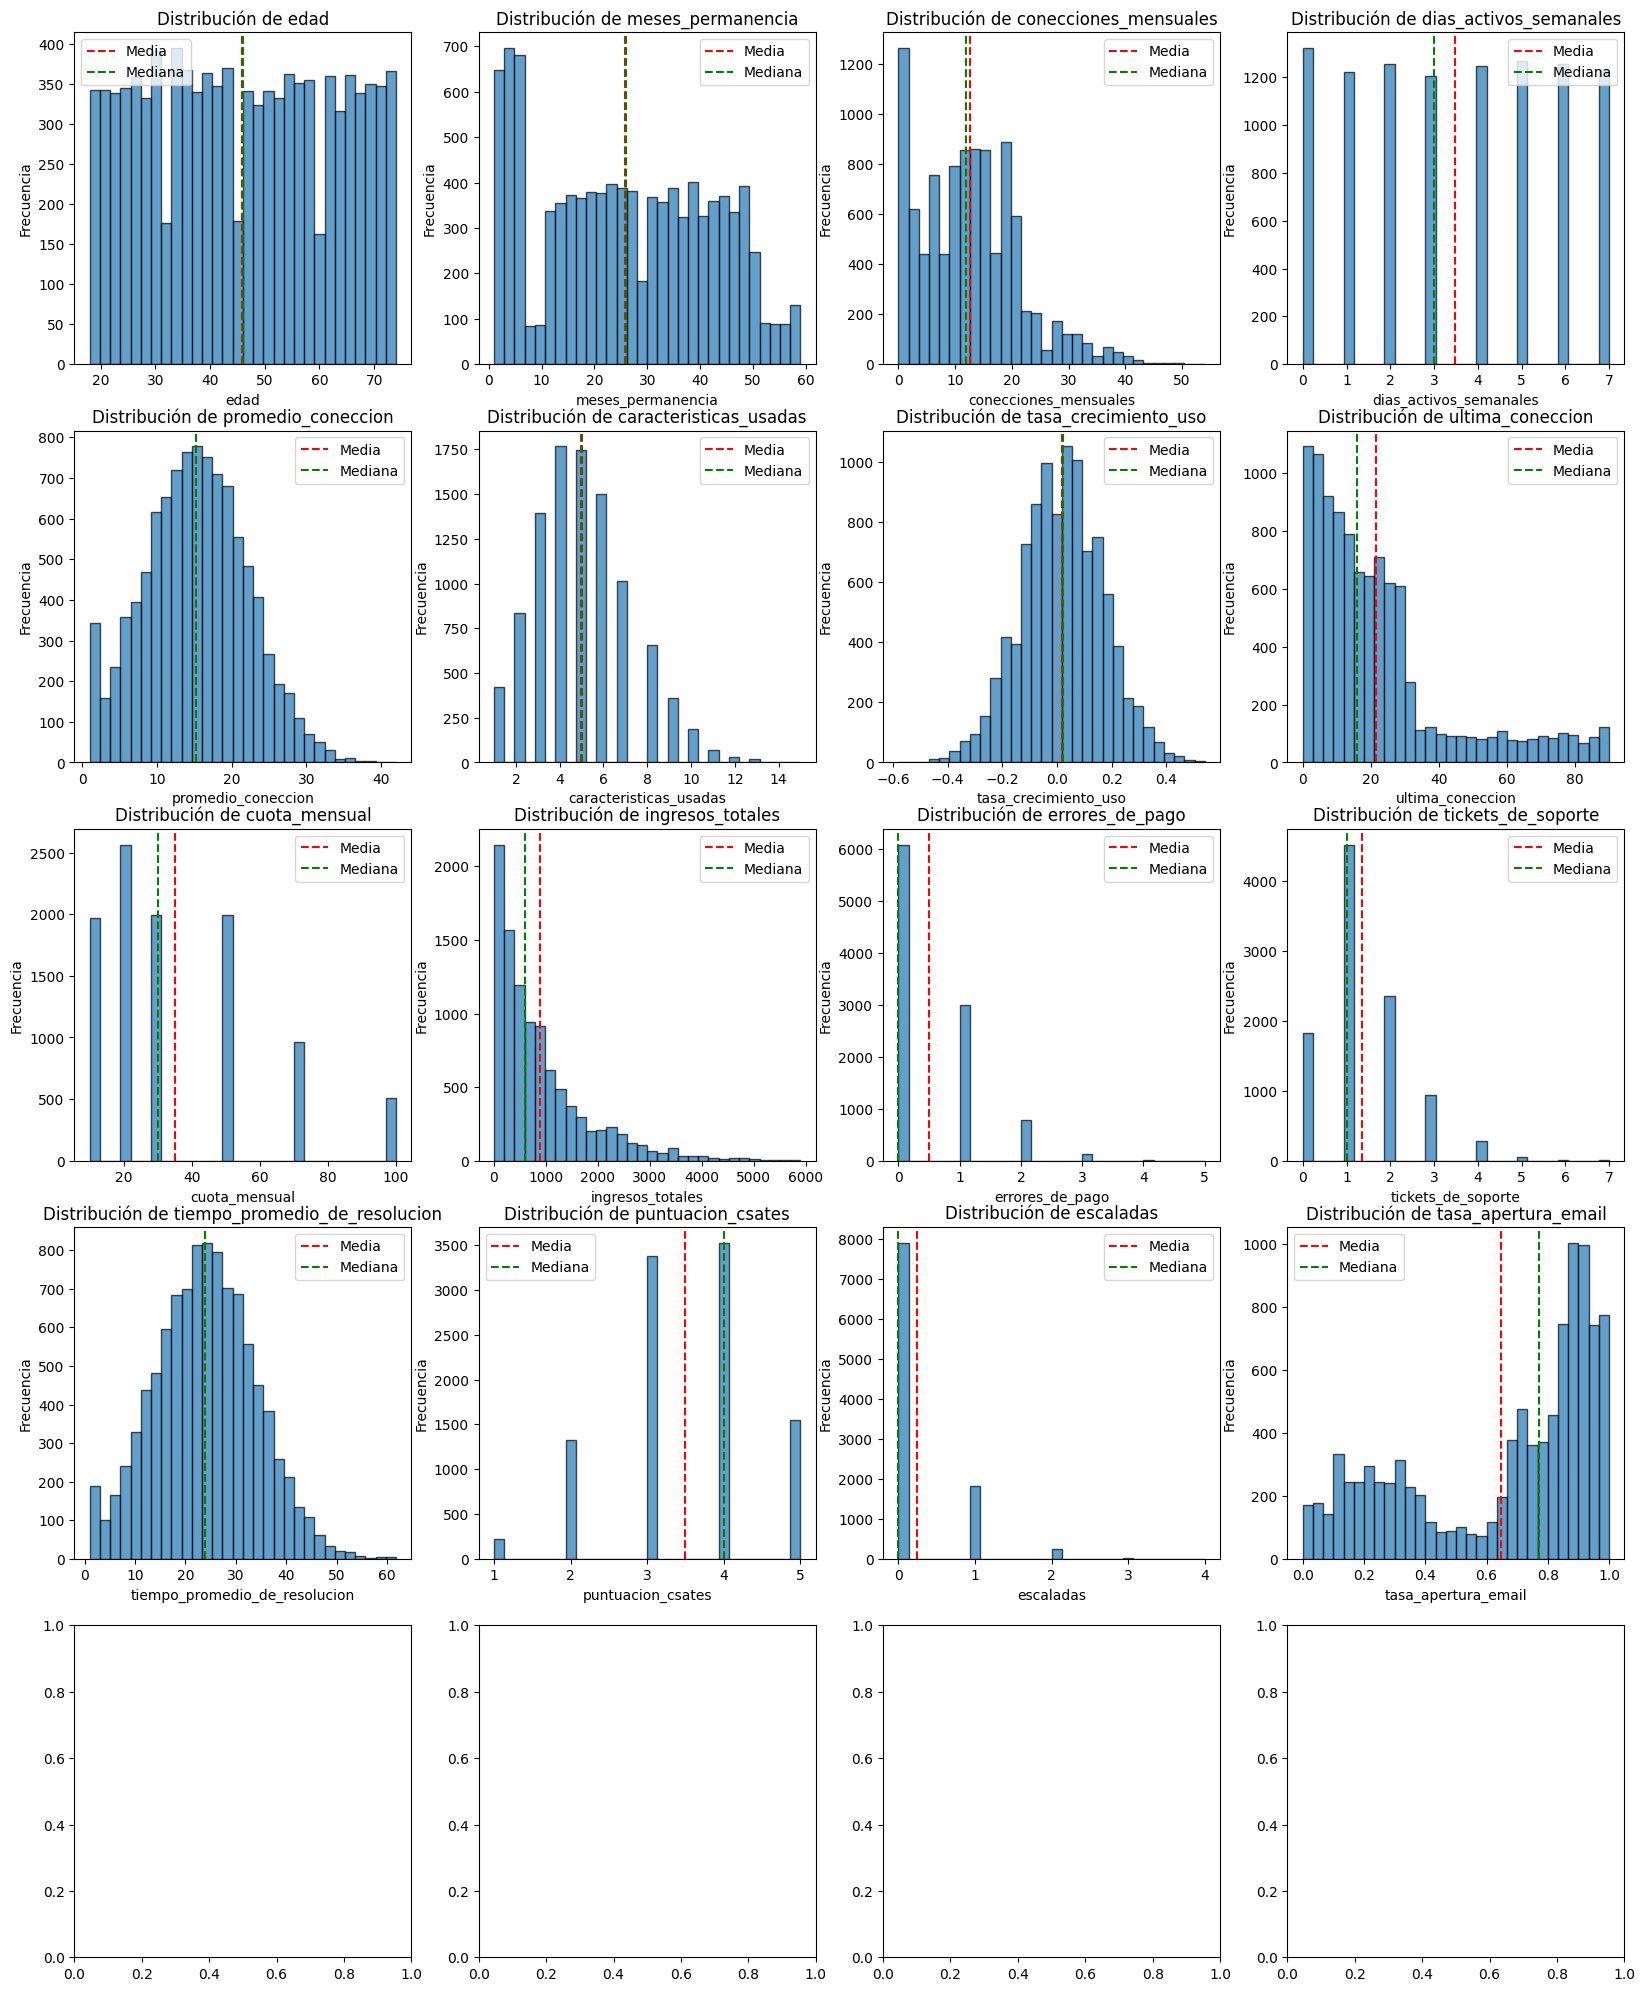

In [6]:
import matplotlib.pyplot as plt

# Histogramas para todas las variables numéricas
num_vars = ['edad', 'meses_permanencia', 'conecciones_mensuales',
            'dias_activos_semanales', 'promedio_coneccion',
            'caracteristicas_usadas', 'tasa_crecimiento_uso',
            'ultima_coneccion', 'cuota_mensual', 'ingresos_totales',
            'errores_de_pago', 'tickets_de_soporte',
            'tiempo_promedio_de_resolucion', 'puntuacion_csates',
            'escaladas', 'tasa_apertura_email', 'tasa_clics_marketing',
            'puntuacion_nps', 'recuento_de_referencias']

fig, axes = plt.subplots(5, 4, figsize=(20, 25))
axes = axes.flatten()

for i, var in enumerate(num_vars):
    axes[i].hist(df[var], bins=30, edgecolor='black', alpha=0.7)
    axes[i].set_title(f'Distribución de {var}')
    axes[i].set_xlabel(var)
    axes[i].set_ylabel('Frecuencia')
    axes[i].axvline(df[var].mean(), color='red', linestyle='--', label='Media')
    axes[i].axvline(df[var].median(), color='green', linestyle='--', label='Mediana')
    axes[i].legend()

plt.tight_layout()
plt.show()

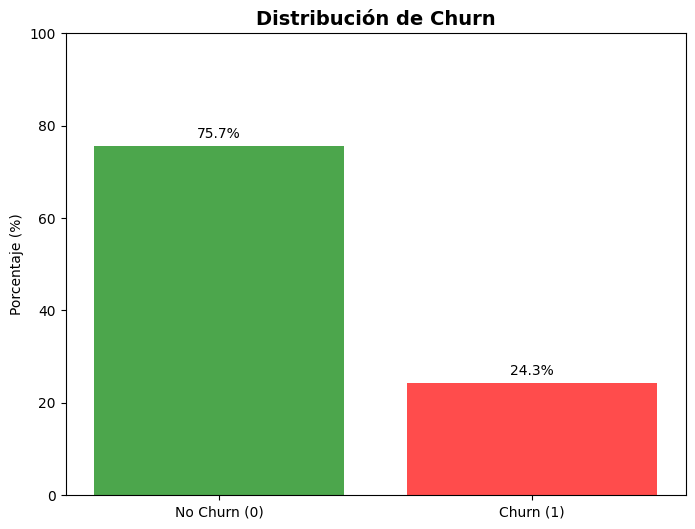

Tasa de churn: 24.31%
Cantidad de churns: 2,431 de 10,000 clientes


In [7]:
# Distribución de churn
churn_dist = df['abandonar'].value_counts(normalize=True) * 100

plt.figure(figsize=(8, 6))
bars = plt.bar(['No Churn (0)', 'Churn (1)'], churn_dist.values,
               color=['green', 'red'], alpha=0.7)
plt.title('Distribución de Churn', fontsize=14, fontweight='bold')
plt.ylabel('Porcentaje (%)')
plt.ylim(0, 100)

# Agregar etiquetas con porcentajes
for bar, percentage in zip(bars, churn_dist.values):
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2., height + 1,
             f'{percentage:.1f}%', ha='center', va='bottom')

plt.show()

print(f"Tasa de churn: {churn_dist[1]:.2f}%")
print(f"Cantidad de churns: {df['abandonar'].sum():,} de {len(df):,} clientes")

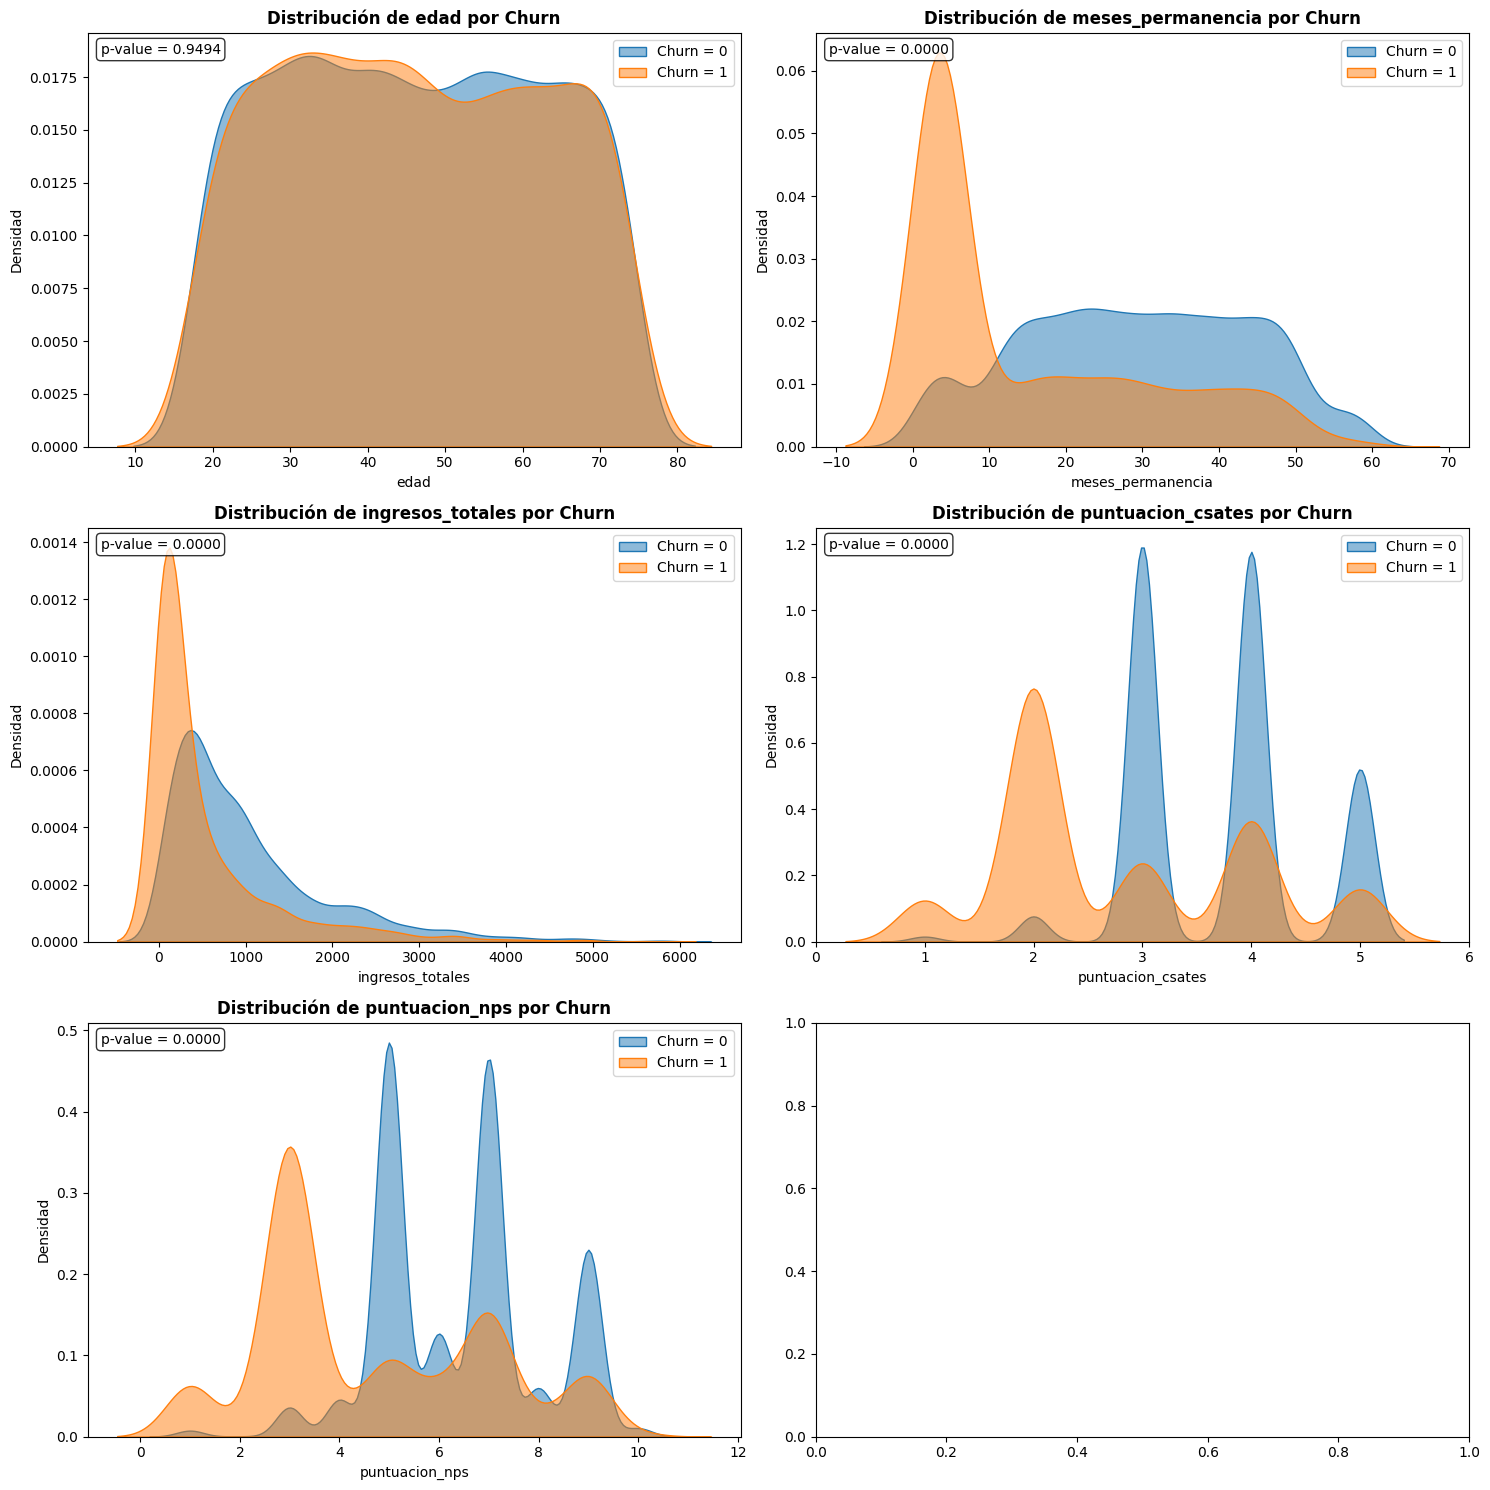

In [8]:
import seaborn as sns
import scipy.stats as stats

# Define key_vars using a selection of relevant numerical columns
key_vars = ['edad', 'meses_permanencia', 'ingresos_totales', 'puntuacion_csates', 'puntuacion_nps']

fig, axes = plt.subplots(3, 2, figsize=(15, 15))
axes = axes.flatten()

for i, var in enumerate(key_vars):
    for churn_val in [0, 1]:
        subset = df[df['abandonar'] == churn_val][var]
        sns.kdeplot(subset, label=f'Churn = {churn_val}',
                   ax=axes[i], fill=True, alpha=0.5)

    axes[i].set_title(f'Distribución de {var} por Churn', fontweight='bold')
    axes[i].set_xlabel(var)
    axes[i].set_ylabel('Densidad')
    axes[i].legend()

    # Test estadístico
    churn_0 = df[df['abandonar'] == 0][var]
    churn_1 = df[df['abandonar'] == 1][var]
    t_stat, p_value = stats.ttest_ind(churn_0, churn_1)
    axes[i].text(0.02, 0.95, f'p-value = {p_value:.4f}',
                transform=axes[i].transAxes,
                bbox=dict(boxstyle="round,pad=0.3", facecolor="white", alpha=0.8))

plt.tight_layout()
plt.show()

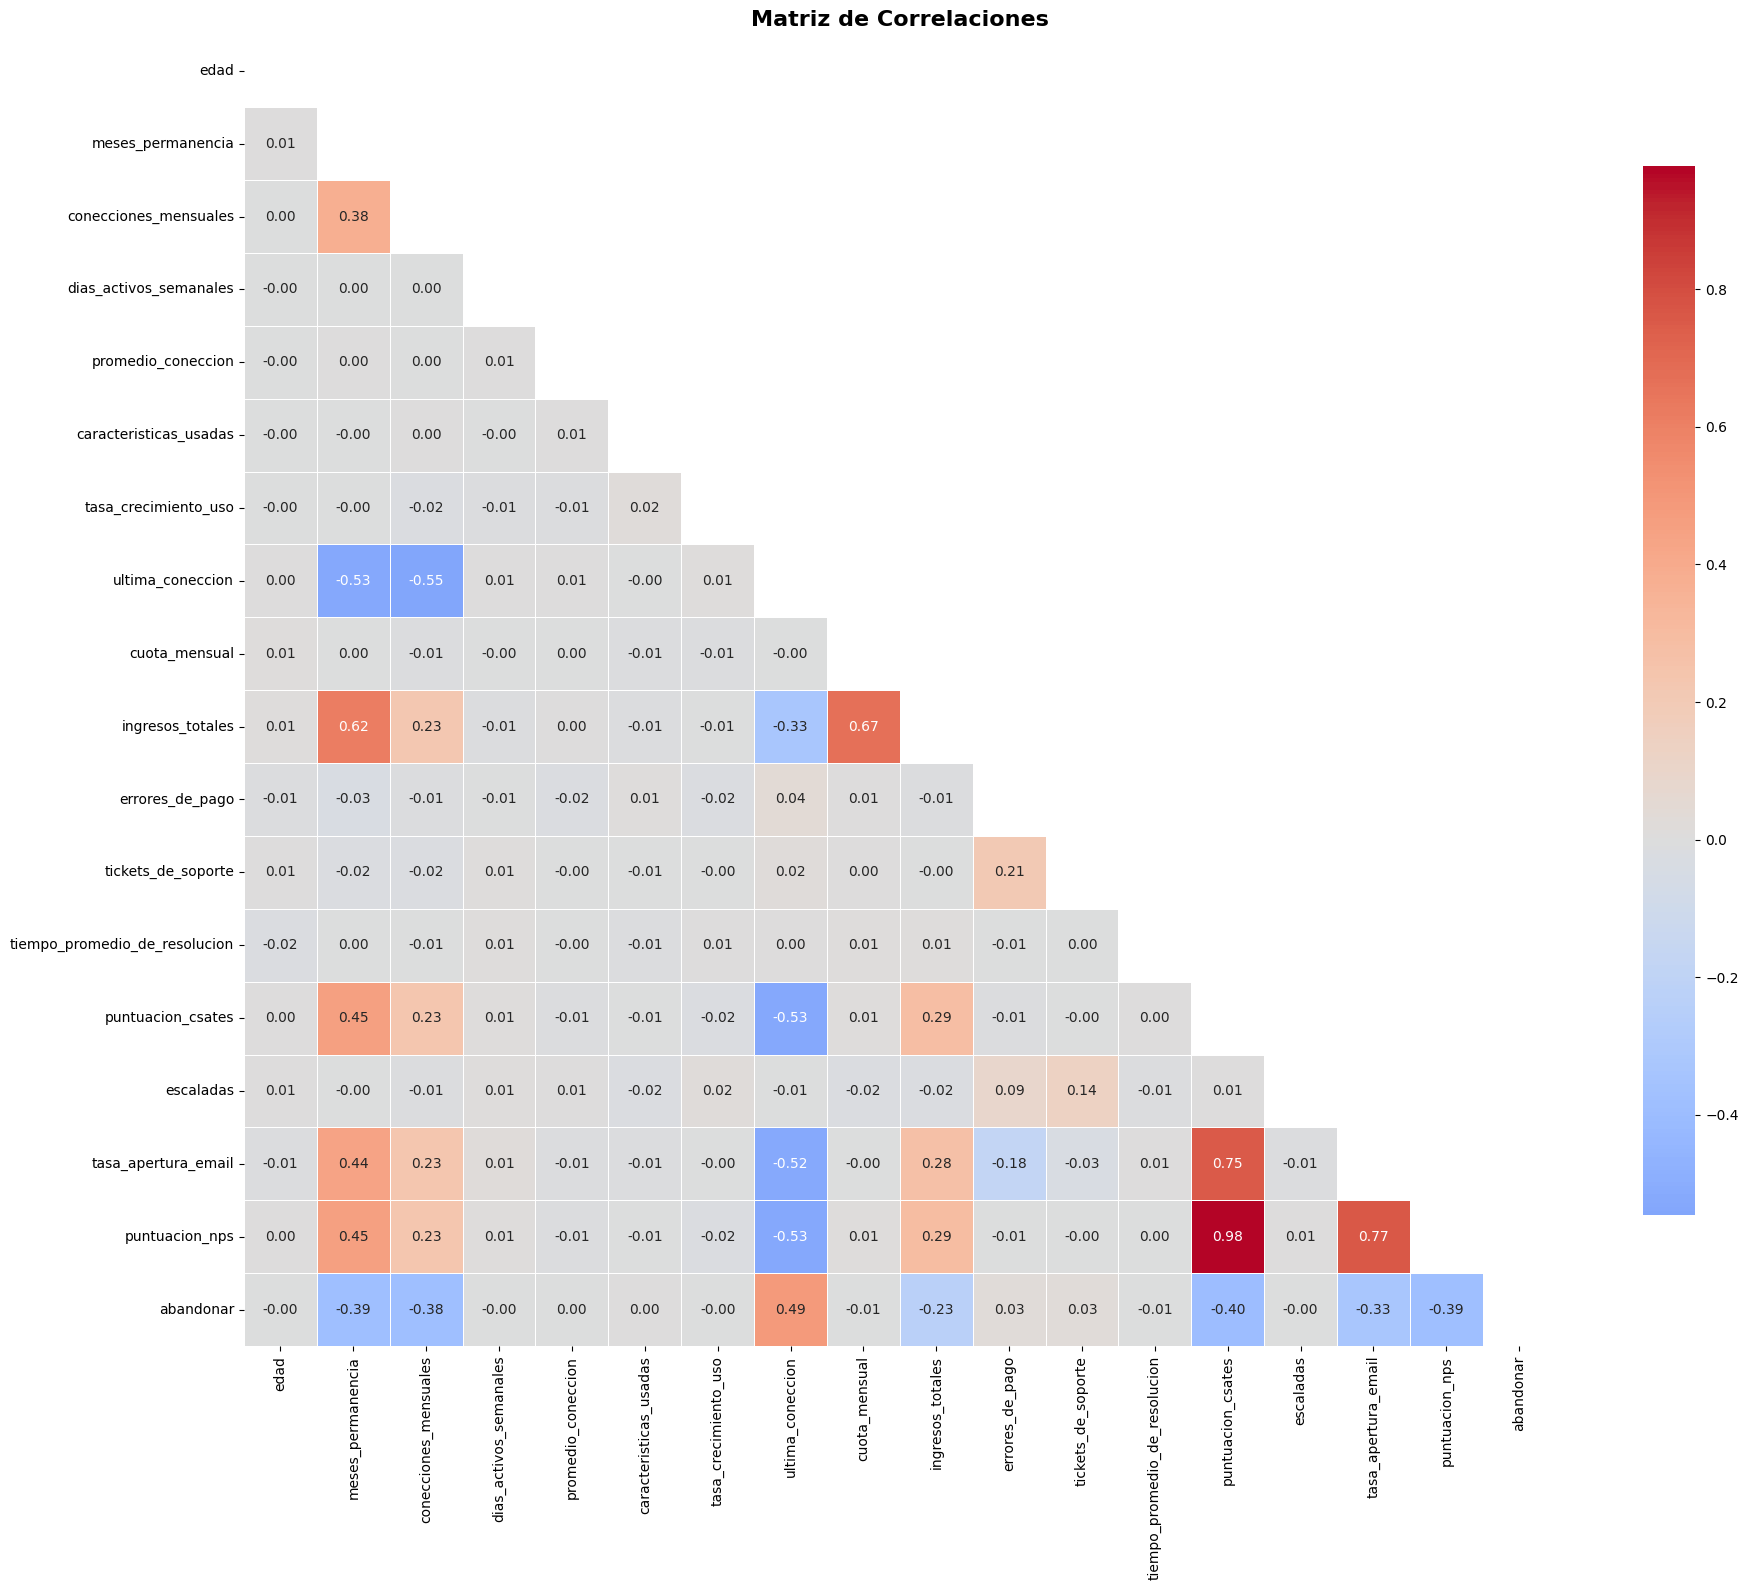

Top 10 correlaciones con Churn (absolutas):
ultima_coneccion                 0.489555
puntuacion_csates               -0.399070
meses_permanencia               -0.388163
puntuacion_nps                  -0.386283
conecciones_mensuales           -0.378897
tasa_apertura_email             -0.330225
ingresos_totales                -0.231368
errores_de_pago                  0.029495
tickets_de_soporte               0.027948
tiempo_promedio_de_resolucion   -0.005448
Name: abandonar, dtype: float64


In [10]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Redefine num_vars to exclude columns not present in df
num_vars = ['edad', 'meses_permanencia', 'conecciones_mensuales',
            'dias_activos_semanales', 'promedio_coneccion',
            'caracteristicas_usadas', 'tasa_crecimiento_uso',
            'ultima_coneccion', 'cuota_mensual', 'ingresos_totales',
            'errores_de_pago', 'tickets_de_soporte',
            'tiempo_promedio_de_resolucion', 'puntuacion_csates',
            'escaladas', 'tasa_apertura_email',
            'puntuacion_nps']

# Calcular correlaciones
corr_matrix = df[num_vars + ['abandonar']].corr()

# Heatmap de correlaciones
plt.figure(figsize=(20, 16))
mask = np.triu(np.ones_like(corr_matrix, dtype=bool))
sns.heatmap(corr_matrix, mask=mask, annot=True, fmt='.2f',
            cmap='coolwarm', center=0, square=True,
            linewidths=0.5, cbar_kws={"shrink": 0.8})
plt.title('Matriz de Correlaciones', fontsize=16, fontweight='bold')
plt.tight_layout()
plt.show()

# Top 10 correlaciones con churn
churn_corr = corr_matrix['abandonar'].sort_values(key=abs, ascending=False)
print("Top 10 correlaciones con Churn (absolutas):")
print(churn_corr[1:11])  # Excluye churn consigo mismo

In [ ]:
1. Variables más relacionadas con el churn (abandonar)

Las correlaciones más relevantes con la variable objetivo parecen ser:

Correlaciones negativas (protegen contra el churn)

puntuacion_nps ≈ -0.39

tasa_apertura_email ≈ -0.33

ingresos_totales ≈ -0.39

 Interpretación:

Clientes más satisfechos (NPS alto) abandonan menos.

Clientes que interactúan con emails tienen menor churn.

Clientes con mayor valor económico son más fieles.

Esto es coherente desde el punto de vista del negocio.

Correlaciones positivas (incrementan el churn)

puntuacion_csates ≈ +0.49

errores_de_pago (débil pero positiva)

tickets_de_soporte (muy débil)

 Interpretación:

Peor experiencia del cliente (CSAT bajo / fricción) está asociada al abandono.

Los problemas de pago y soporte influyen, pero no son determinantes por sí solos.

Relaciones fuertes entre variables explicativas (multicolinealidad)

Aquí hay hallazgos clave para modelos predictivos:

Correlaciones muy altas

puntuacion_nps ↔ tasa_apertura_email ≈ 0.98

tasa_apertura_email ↔ puntuacion_csates ≈ 0.75

puntuacion_nps ↔ puntuacion_csates ≈ 0.77

 Implicación:
Estas variables aportan información casi redundante.

Para modelos lineales (Logistic Regression):

Conviene eliminar o combinar algunas columnas para evitar multicolinealidad.

 Para modelos de árboles (Random Forest, XGBoost):

Menos problemático, pero sigue siendo información duplicada

Ingresos y satisfacción del cliente

ingresos_totales ↔ puntuacion_nps ≈ 0.67

ingresos_totales ↔ tasa_apertura_email ≈ 0.62

ingresos_totales ↔ puntuacion_csates ≈ 0.45

Conclusión clara:

Los clientes más satisfechos generan más ingresos y abandonan menos.

Esto sugiere que:

El churn no es solo un problema técnico, sino relacional y experiencial.

Variables con poco poder explicativo individual

Variables con correlaciones cercanas a 0:

tiempo_medio_de_resolucion

escaladas

errores_de_pago (muy bajo)

tickets_de_soporte (débil)

No significa que no sirvan:

Pueden tener relaciones no lineales

Pueden ser útiles en combinación con otras variables



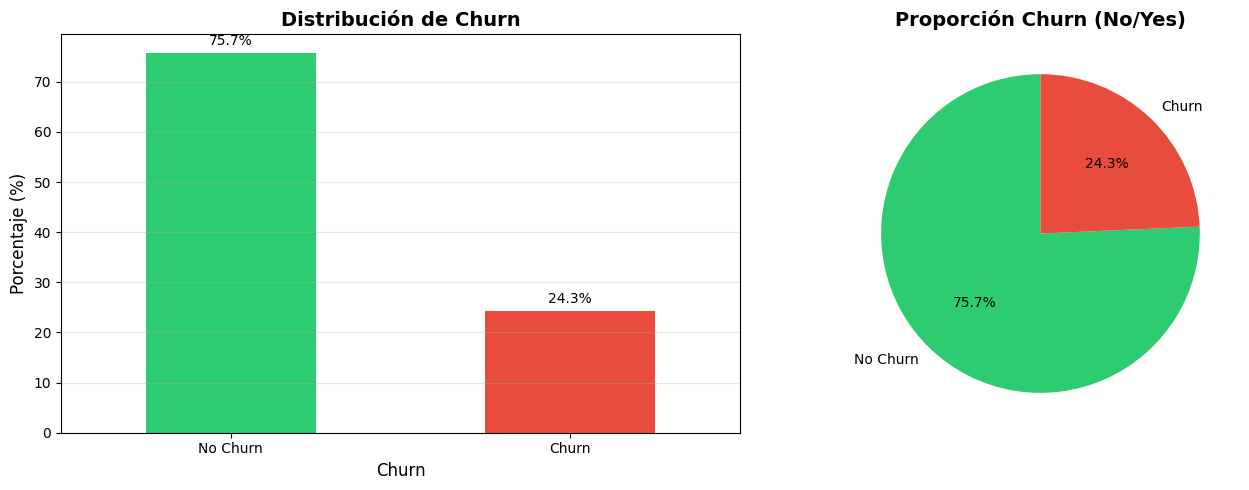

💾 Gráfico guardado: reports/figures/01_churn_distribution.png


In [15]:
# Visualización de Churn
import matplotlib.pyplot as plt
import os

fig, axes = plt.subplots(1, 2, figsize=(14, 5))

# Gráfico de barras
# Use churn_dist (which is defined in the kernel state)
churn_dist.plot(kind='bar', ax=axes[0], color=['#2ecc71', '#e74c3c'])
axes[0].set_title('Distribución de Churn', fontsize=14, fontweight='bold')
axes[0].set_xlabel('Churn', fontsize=12)
axes[0].set_ylabel('Porcentaje (%)', fontsize=12)
axes[0].set_xticks([0, 1])
axes[0].set_xticklabels(['No Churn', 'Churn'], rotation=0) # Set meaningful labels
axes[0].grid(axis='y', alpha=0.3)

# Add percentage labels on top of bars
for i, percentage in enumerate(churn_dist.values):
    axes[0].text(i, percentage + 1, f'{percentage:.1f}%', ha='center', va='bottom', fontsize=10)

# Gráfico de pastel (solo Yes/No)
# Use churn_dist (which is defined in the kernel state)
axes[1].pie(churn_dist, labels=['No Churn', 'Churn'], autopct='%1.1f%%',
            colors=['#2ecc71', '#e74c3c'], startangle=90)
axes[1].set_title('Proporción Churn (No/Yes)', fontsize=14, fontweight='bold')

plt.tight_layout()

# Ensure the directory exists before saving
output_dir = '../reports/figures/'
os.makedirs(output_dir, exist_ok=True)

plt.savefig(os.path.join(output_dir, '01_churn_distribution.png'), dpi=300, bbox_inches='tight')
plt.show()

print("💾 Gráfico guardado: reports/figures/01_churn_distribution.png")

In [13]:
# Seleccionar variables categóricas
categorical_cols = df.select_dtypes(include=['object']).columns.tolist()

# Excluir ID y fecha
categorical_cols = [col for col in categorical_cols if col not in ['CustomerID', 'RegistrationDate']]

print("=" * 80)
print("ANÁLISIS DE VARIABLES CATEGÓRICAS")
print("=" * 80)

print(f"\nTotal de variables categóricas: {len(categorical_cols)}\n")

for col in categorical_cols[:15]:  # Mostrar primeras 15
    unique_count = df[col].nunique()
    print(f"\n{col} ({unique_count} valores únicos):")

    value_counts = df[col].value_counts()
    for val, count in value_counts.head(5).items():
        pct = count / len(df) * 100
        bar = "█" * int(pct / 2)
        print(f"   {str(val):30s}: {count:5,} ({pct:5.2f}%) {bar}")

ANÁLISIS DE VARIABLES CATEGÓRICAS

Total de variables categóricas: 11


cliente_id (10000 valores únicos):
   cust09984                     :     1 ( 0.01%) 
   cust09983                     :     1 ( 0.01%) 
   cust09982                     :     1 ( 0.01%) 
   cust09981                     :     1 ( 0.01%) 
   cust09980                     :     1 ( 0.01%) 

genero (2 valores únicos):
   masculino                     : 5,013 (50.13%) █████████████████████████
   femenino                      : 4,987 (49.87%) ████████████████████████

pais (7 valores únicos):
   uk                            : 1,518 (15.18%) ███████
   australia                     : 1,471 (14.71%) ███████
   banglades                     : 1,459 (14.59%) ███████
   india                         : 1,402 (14.02%) ███████
   alemania                      : 1,386 (13.86%) ██████

ciudad (7 valores únicos):
   londres                       : 1,518 (15.18%) ███████
   sydney                        : 1,471 (14.71%) ███████


ANÁLISIS DE MULTICOLINEALIDAD - VIF (Variance Inflation Factor)

📊 ¿Qué es VIF?
   VIF mide cuánta redundancia tiene una variable con respecto a las demás.
   Indica qué tan bien puede predecirse una variable usando las otras.

   Interpretación:
   • VIF = 1      → Sin correlación con otras variables
   • VIF = 1-5    → ✅ Baja multicolinealidad (aceptable)
   • VIF = 5-10   → ⚠️  Multicolinealidad moderada (revisar)
   • VIF > 10     → 🔴 Alta multicolinealidad (eliminar variable)


🔧 Calculando VIF para 17 variables numéricas...

RESULTADOS VIF:
--------------------------------------------------------------------------------
puntuacion_csates    | VIF:   303.01 | 🔴 Alta          | Acción: Revisar/Eliminar
puntuacion_nps       | VIF:   257.86 | 🔴 Alta          | Acción: Revisar/Eliminar
tasa_apertura_email  | VIF:    15.02 | 🔴 Alta          | Acción: Revisar/Eliminar
meses_permanencia    | VIF:    12.10 | 🔴 Alta          | Acción: Revisar/Eliminar
ingresos_totales     | VIF:    10.54 |

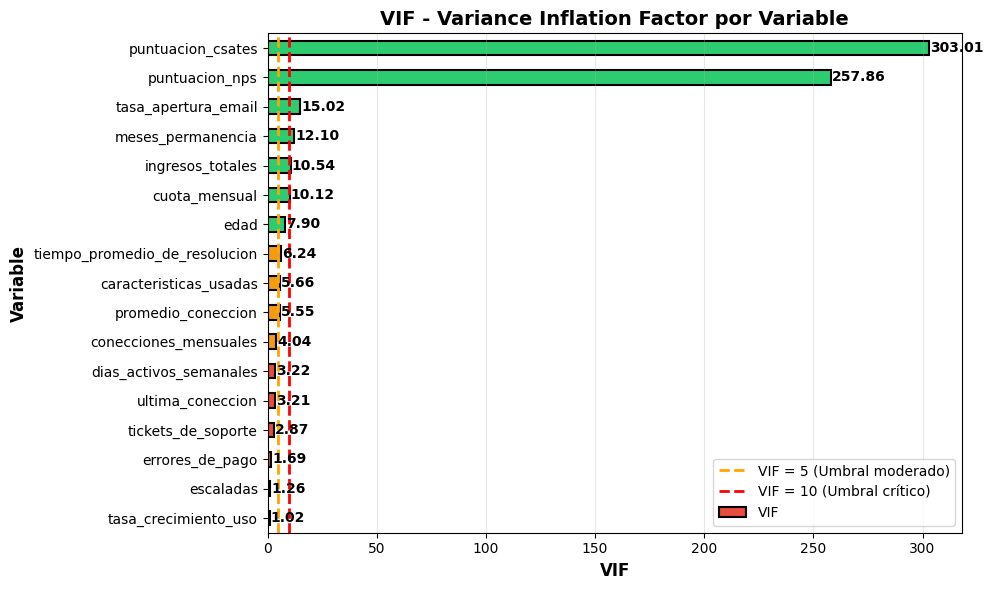


💾 Gráfico guardado: reports/figures/03_vif_analysis.png



In [16]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

print("=" * 80)
print("ANÁLISIS DE MULTICOLINEALIDAD - VIF (Variance Inflation Factor)")
print("=" * 80)

print("\n📊 ¿Qué es VIF?")
print("   VIF mide cuánta redundancia tiene una variable con respecto a las demás.")
print("   Indica qué tan bien puede predecirse una variable usando las otras.\n")

print("   Interpretación:")
print("   • VIF = 1      → Sin correlación con otras variables")
print("   • VIF = 1-5    → ✅ Baja multicolinealidad (aceptable)")
print("   • VIF = 5-10   → ⚠️  Multicolinealidad moderada (revisar)")
print("   • VIF > 10     → 🔴 Alta multicolinealidad (eliminar variable)")

print("\n" + "=" * 80)

# Seleccionar variables numéricas para VIF (sin IDs ni variables derivadas temporales)
# Actualizar vif_vars con los nombres de columnas correctos de tu DataFrame
vif_vars = ['edad', 'meses_permanencia', 'conecciones_mensuales',
            'dias_activos_semanales', 'promedio_coneccion',
            'caracteristicas_usadas', 'tasa_crecimiento_uso',
            'ultima_coneccion', 'cuota_mensual', 'ingresos_totales',
            'errores_de_pago', 'tickets_de_soporte',
            'tiempo_promedio_de_resolucion', 'puntuacion_csates',
            'escaladas', 'tasa_apertura_email',
            'puntuacion_nps']

# Crear dataframe solo con las variables seleccionadas (sin nulls)
df_vif = df[vif_vars].dropna()

print(f"\n🔧 Calculando VIF para {len(vif_vars)} variables numéricas...\n")

# Calcular VIF para cada variable
vif_data = []
for i, var in enumerate(df_vif.columns):
    vif_value = variance_inflation_factor(df_vif.values, i)
    vif_data.append({
        'Variable': var,
        'VIF': vif_value
    })

# Crear DataFrame con resultados
vif_df = pd.DataFrame(vif_data).sort_values('VIF', ascending=False)

# Agregar interpretación
def interpret_vif(vif):
    if vif < 5:
        return "✅ Baja"
    elif vif < 10:
        return "⚠️  Moderada"
    else:
        return "🔴 Alta"

vif_df['Multicolinealidad'] = vif_df['VIF'].apply(interpret_vif)
vif_df['Acción'] = vif_df['VIF'].apply(lambda x: 'Conservar' if x < 10 else 'Revisar/Eliminar')

print("RESULTADOS VIF:")
print("-" * 80)
for idx, row in vif_df.iterrows():
    print(f"{row['Variable']:20s} | VIF: {row['VIF']:8.2f} | {row['Multicolinealidad']:15s} | Acción: {row['Acción']}")

print("\n" + "=" * 80)

# Identificar variables problemáticas
high_vif = vif_df[vif_df['VIF'] > 10]

if len(high_vif) > 0:
    print(f"\n⚠️  VARIABLES CON ALTA MULTICOLINEALIDAD (VIF > 10):")
    print("-" * 80)
    for idx, row in high_vif.iterrows():
        print(f"\n🔴 {row['Variable']} (VIF = {row['VIF']:.2f})")

        # Mostrar correlaciones con otras variables
        corr_with_others = df_vif.corr()[row['Variable']].drop(row['Variable']).sort_values(key=abs, ascending=False)
        print(f"   Correlaciones más fuertes:")
        for var, corr in corr_with_others.head(3).items():
            print(f"      • {var}: {corr:.4f}")

    print("\n💡 RECOMENDACIONES:")
    print("   Para modelos lineales (Logistic Regression), considera:")
    for idx, row in high_vif.iterrows():
        print(f"   • Eliminar '{row['Variable']}' del modelo")
        # Sugerir alternativa
        if 'ChargesTotal' in row['Variable']:
            print(f"     Razón: ChargesTotal ≈ ChargesMonthly × Tenure (información redundante)")
        elif 'Latitude' in row['Variable'] or 'Longitude' in row['Variable']:
            print(f"     Alternativa: Usar solo 'MedianIncome' o 'Borough'")

    print("\n   📌 Nota: Modelos basados en árboles (Random Forest, XGBoost)")
    print("      son menos sensibles a multicolinealidad, pero aún así")
    print("      eliminar variables redundantes mejora interpretabilidad.")

else:
    print("\n✅ EXCELENTE: No se encontraron variables con VIF > 10")
    print("   El dataset está listo para modelado sin problemas de multicolinealidad.")

# Visualización
fig, ax = plt.subplots(figsize=(10, 6))

colors = ['#e74c3c' if x > 10 else '#f39c12' if x > 5 else '#2ecc71' for x in vif_df['VIF']]

vif_df.sort_values('VIF').plot(
    x='Variable',
    y='VIF',
    kind='barh',
    ax=ax,
    color=colors,
    edgecolor='black',
    linewidth=1.5,
    legend=False
)

ax.set_title('VIF - Variance Inflation Factor por Variable', fontsize=14, fontweight='bold')
ax.set_xlabel('VIF', fontsize=12, fontweight='bold')
ax.set_ylabel('Variable', fontsize=12, fontweight='bold')
ax.axvline(5, color='orange', linestyle='--', linewidth=2, label='VIF = 5 (Umbral moderado)')
ax.axvline(10, color='red', linestyle='--', linewidth=2, label='VIF = 10 (Umbral crítico)')
ax.legend()
ax.grid(axis='x', alpha=0.3)

# Agregar valores en las barras
for i, (idx, row) in enumerate(vif_df.sort_values('VIF').iterrows()):
    ax.text(row['VIF'] + 0.5, i, f"{row['VIF']:.2f}", va='center', fontweight='bold')

plt.tight_layout()
plt.savefig('../reports/figures/03_vif_analysis.png', dpi=300, bbox_inches='tight')
plt.show()

print("\n💾 Gráfico guardado: reports/figures/03_vif_analysis.png")
print("\n" + "=" * 80)


MATRIZ DE CORRELACIÓN COMPLETA - Numéricas + Categóricas Codificadas

🔧 Codificación inteligente de variables categóricas (evitando redundancias)...

Variables categóricas a codificar: ['genero', 'pais', 'ciudad', 'segmento_de_cliente', 'canal_de_registro', 'tipo_contrato', 'metodo_de_pago', 'tipo_de_queja', 'respuesta_de_la_encuesta', 'Estado_de_Conexion']
✓ Variables categóricas codificadas. Dimensiones dataset: (10000, 53)
✓ Total de features seleccionados para correlación: 52
   - Numéricas originales: 21
   - Categóricas codificadas: 32

📊 Top 20 Features más correlacionados con Churn:

   1. Estado_de_Conexion_inactivo                  :  0.5448 ↑ (Fuerte)
   2. Permanencia_Corta                            :  0.5332 ↑ (Fuerte)
   3. ultima_coneccion                             :  0.4896 ↑ (Fuerte)
   4. puntuacion_csates                            : -0.3991 ↓ (Fuerte)
   5. meses_permanencia                            : -0.3882 ↓ (Fuerte)
   6. puntuacion_nps                     

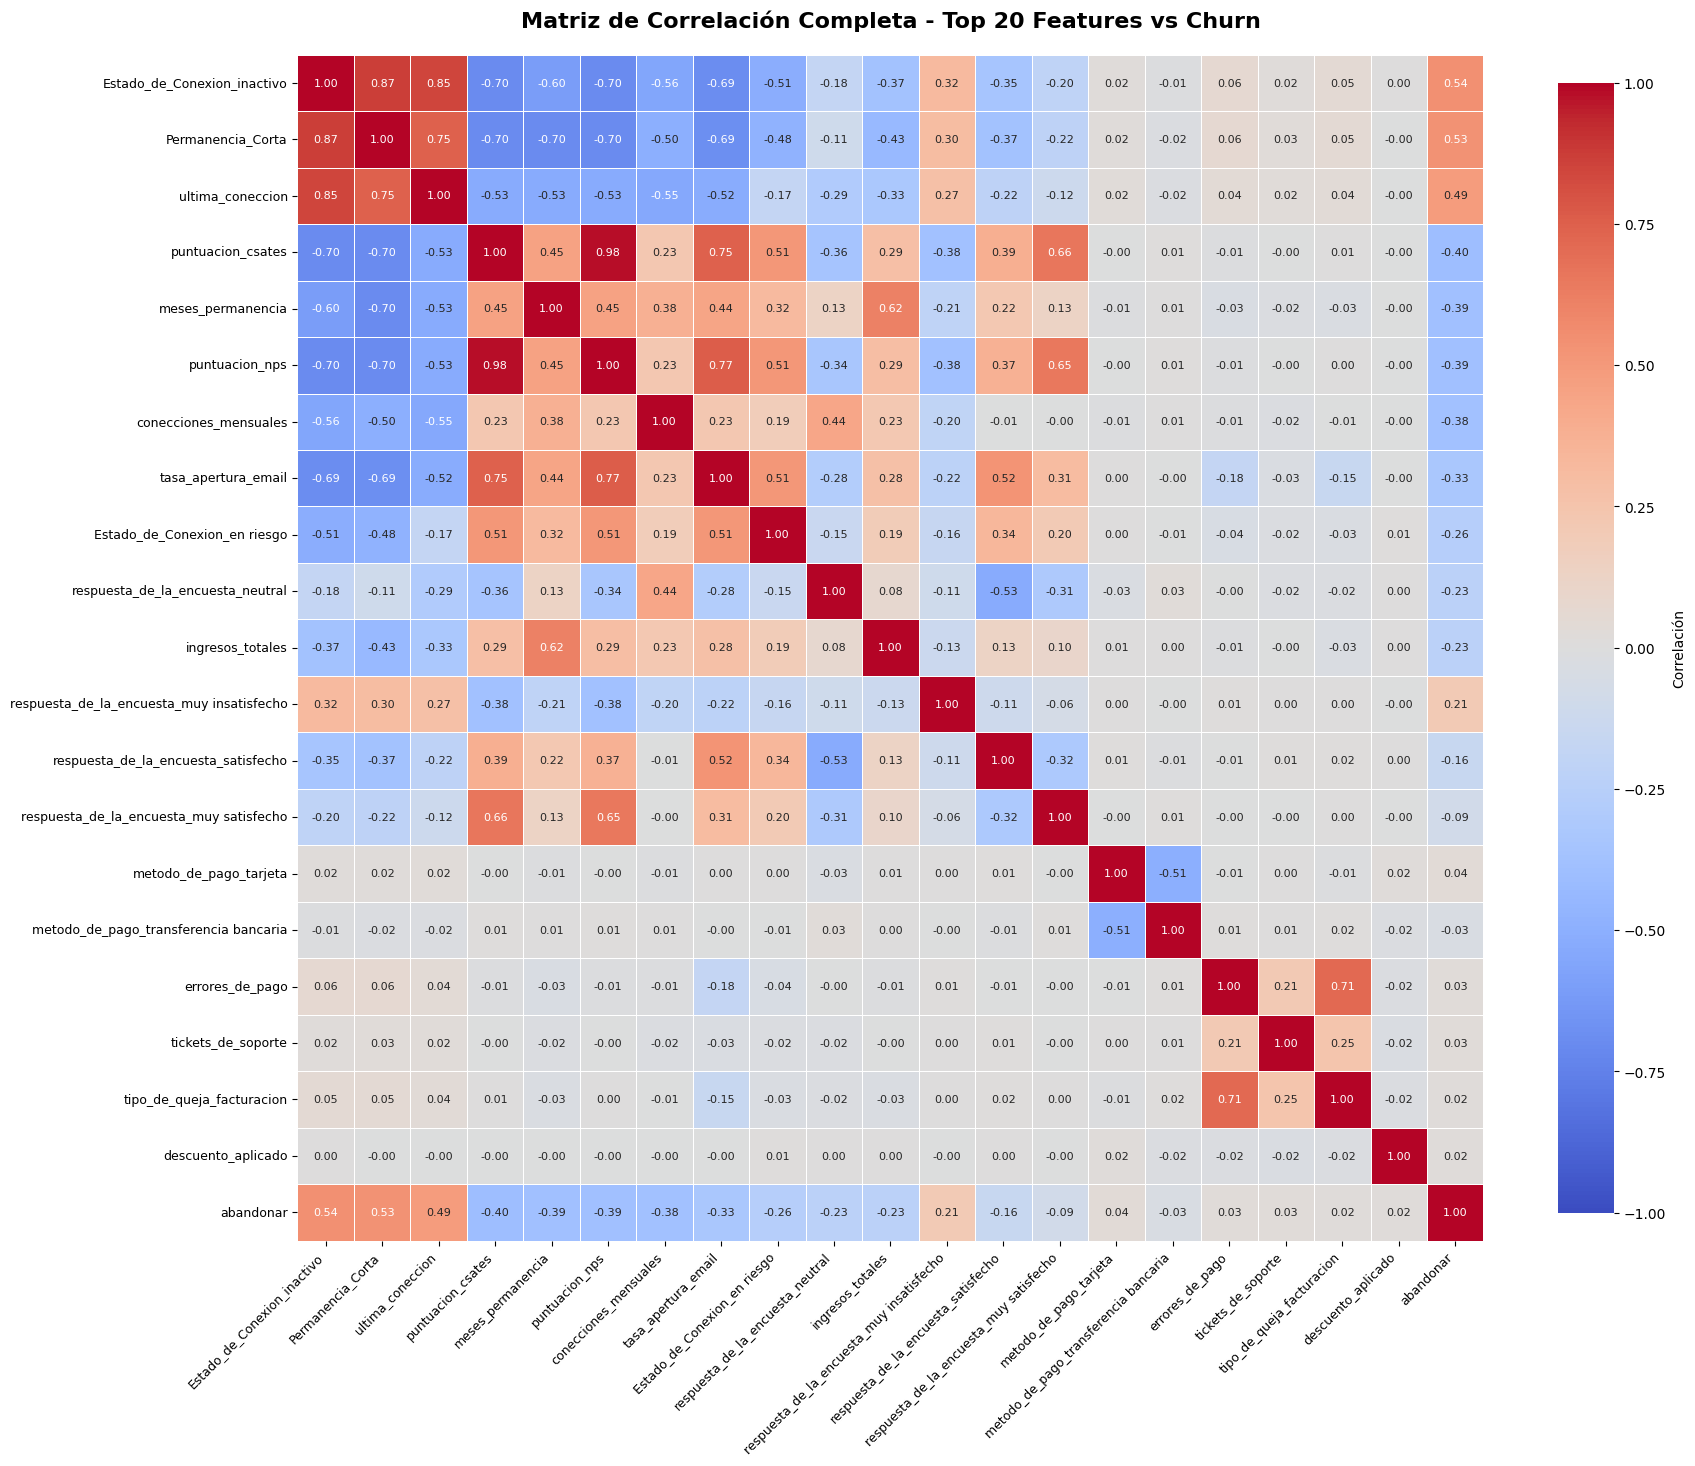

💾 Gráfico guardado: reports/figures/03_correlation_matrix_full.png


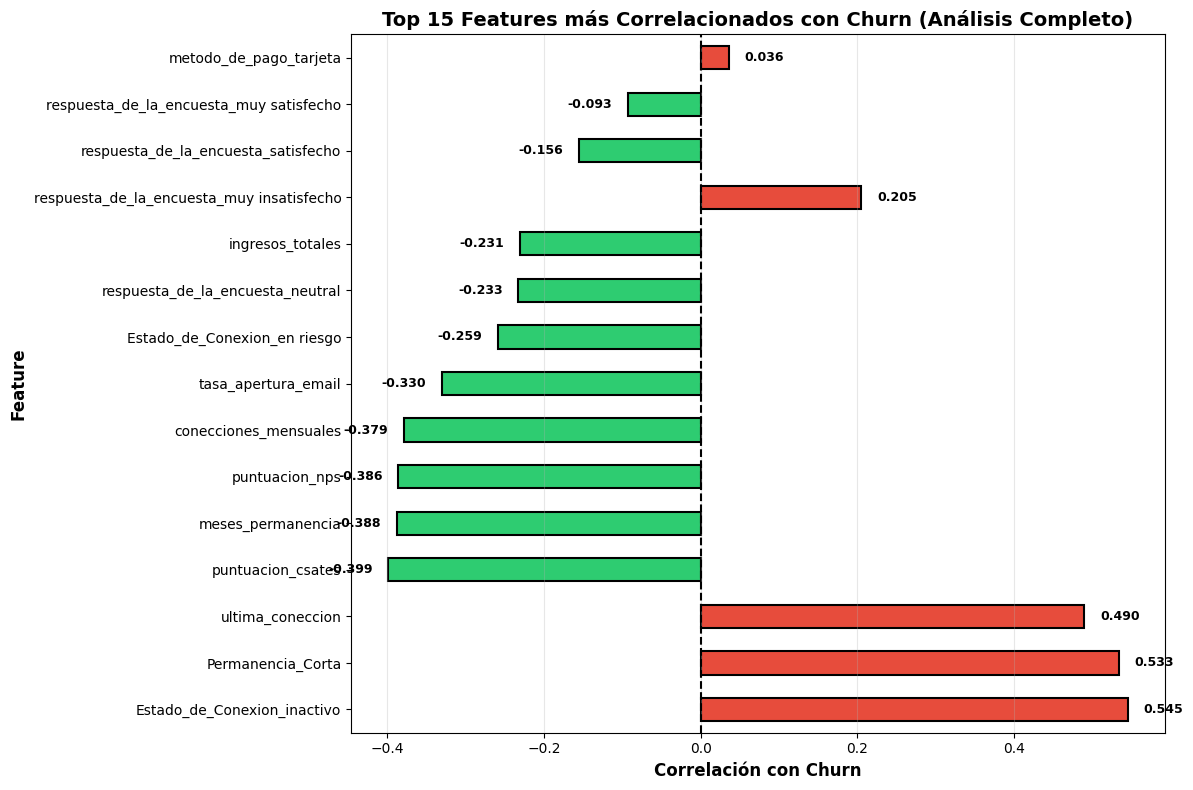

💾 Gráfico guardado: reports/figures/03_top_features_full_correlation.png

✅ INSIGHTS - Variables Categóricas Codificadas

🔵 MÉTODO DE PAGO:
   • metodo_de_pago_tarjeta: 0.0358

🔵 RESPUESTA ENCUESTA:
   • respuesta_de_la_encuesta_neutral: -0.2330
   • respuesta_de_la_encuesta_muy insatisfecho: 0.2050
   • respuesta_de_la_encuesta_satisfecho: -0.1559
   • respuesta_de_la_encuesta_muy satisfecho: -0.0932

🔵 ESTADO DE CONEXIÓN:
   • Estado_de_Conexion_inactivo: 0.5448
   • Estado_de_Conexion_en riesgo: -0.2586

🔍 VERIFICACIÓN DE MULTICOLINEALIDAD

⚠️  Encontradas 7 pares de variables con correlación > 0.95
   (Pueden causar problemas de multicolinealidad en modelos lineales)

  1. puntuacion_csates                   ↔ puntuacion_nps                      : 0.9800
  2. pais_australia                      ↔ ciudad_sydney                       : 1.0000
  3. pais_banglades                      ↔ ciudad_dhaka                        : 1.0000
  4. pais_canada                         ↔ ciudad_toron

In [18]:
print("=" * 80)
print("MATRIZ DE CORRELACIÓN COMPLETA - Numéricas + Categóricas Codificadas")
print("=" * 80)

# Crear copia del dataframe para codificar
df_encoded = df.copy()

print(f"\n🔧 Codificación inteligente de variables categóricas (evitando redundancias)...\n")

# ========================================
# 1. IDENTIFICAR VARIABLES CATEGÓRICAS
# ========================================
categorical_cols_to_encode = [col for col in df_encoded.select_dtypes(include=['object']).columns if col != 'cliente_id']

print(f"Variables categóricas a codificar: {categorical_cols_to_encode}")

# ========================================
# 2. APLICAR ONE-HOT ENCODING CON drop_first=True
#    Esto maneja tanto binarias como multiclase de forma consistente
# ========================================
for col in categorical_cols_to_encode:
    dummies = pd.get_dummies(df_encoded[col], prefix=col, drop_first=True, dtype=int)
    df_encoded = pd.concat([df_encoded, dummies], axis=1)
    df_encoded.drop(columns=[col], inplace=True) # Eliminar la columna original

print(f"✓ Variables categóricas codificadas. Dimensiones dataset: {df_encoded.shape}")

# ========================================
# 3. SELECCIONAR SOLO NUMÉRICAS RELEVANTES Y LAS NUEVAS COLUMNAS CODIFICADAS
# ========================================

# Columnas numéricas originales (las que no eran object y no son 'cliente_id')
numeric_original_cols = df.select_dtypes(include=['int64', 'float64']).columns.tolist()

# Asegurarse de que el target 'abandonar' esté presente para la correlación
if 'abandonar' not in numeric_original_cols:
    print("Advertencia: 'abandonar' no encontrada en columnas numéricas originales.")
    # Asumiendo que 'abandonar' es 0/1 y se convertirá a numérico si fuera necesario

# Las columnas resultantes de la codificación one-hot
encoded_features_cols = [col for col in df_encoded.columns if col not in df.columns or col in categorical_cols_to_encode]

# Combinar todas las features (numéricas originales + las nuevas codificadas)
all_features = numeric_original_cols + [col for col in encoded_features_cols if col not in numeric_original_cols and col not in ['cliente_id']]

# Filtrar cliente_id si estuviera presente en all_features
if 'cliente_id' in all_features:
    all_features.remove('cliente_id')

df_numeric_all = df_encoded[all_features]

print(f"✓ Total de features seleccionados para correlación: {len(all_features)}")
print(f"   - Numéricas originales: {len(numeric_original_cols)}")
print(f"   - Categóricas codificadas: {len(all_features) - len(numeric_original_cols) + 1}") # +1 because 'abandonar' is removed from categorical_cols_to_encode and included in numeric_original_cols

# ========================================
# 4. CALCULAR MATRIZ DE CORRELACIÓN
# ========================================
corr_matrix_full = df_numeric_all.corr()

# Extraer correlaciones con 'abandonar' (la variable objetivo)
if 'abandonar' in corr_matrix_full.columns:
    churn_corr_full = corr_matrix_full['abandonar'].drop('abandonar').sort_values(key=abs, ascending=False)

    print(f"\n📊 Top 20 Features más correlacionados con Churn:\n")
    for i, (feature, corr) in enumerate(churn_corr_full.head(20).items(), 1):
        direction = "↑" if corr > 0 else "↓"
        strength = "Fuerte" if abs(corr) > 0.3 else "Moderada" if abs(corr) > 0.1 else "Débil"
        print(f"  {i:2d}. {feature:45s}: {corr:7.4f} {direction} ({strength})")

    # ========================================
    # 5. VISUALIZACIÓN: HEATMAP TOP 20
    # ========================================
    print("\n" + "=" * 80)
    print("Generando heatmap profesional con Top 20 features...")

    # Seleccionar top 20 features + 'abandonar'
    top_20_features = churn_corr_full.head(20).index.tolist() + ['abandonar']
    corr_subset = corr_matrix_full.loc[top_20_features, top_20_features]

    fig, ax = plt.subplots(figsize=(18, 16))

    sns.heatmap(
        corr_subset,
        annot=True,
        fmt='.2f',
        cmap='coolwarm',
        center=0,
        square=True,
        linewidths=0.5,
        cbar_kws={"shrink": 0.8, "label": "Correlación"},
        ax=ax,
        annot_kws={'size': 8},
        vmin=-1,
        vmax=1
    )

    ax.set_title('Matriz de Correlación Completa - Top 20 Features vs Churn',
                 fontsize=16, fontweight='bold', pad=20)

    plt.xticks(rotation=45, ha='right', fontsize=9)
    plt.yticks(rotation=0, fontsize=9)
    plt.tight_layout()
    output_dir = '../reports/figures/'
    os.makedirs(output_dir, exist_ok=True)
    plt.savefig(os.path.join(output_dir, '03_correlation_matrix_full.png'), dpi=300, bbox_inches='tight')
    plt.show()

    print("💾 Gráfico guardado: reports/figures/03_correlation_matrix_full.png")

    # ========================================
    # 6. VISUALIZACIÓN: BAR CHART TOP 15
    # ========================================
    fig, ax = plt.subplots(figsize=(12, 8))

    top_15_churn = churn_corr_full.head(15)
    colors = ['#e74c3c' if x > 0 else '#2ecc71' for x in top_15_churn.values]

    top_15_churn.plot(kind='barh', ax=ax, color=colors, edgecolor='black', linewidth=1.5)

    ax.set_title('Top 15 Features más Correlacionados con Churn (Análisis Completo)',
                 fontsize=14, fontweight='bold')
    ax.set_xlabel('Correlación con Churn', fontsize=12, fontweight='bold')
    ax.set_ylabel('Feature', fontsize=12, fontweight='bold')
    ax.axvline(0, color='black', linewidth=1.5, linestyle='--')
    ax.grid(axis='x', alpha=0.3)

    # Agregar valores en las barras
    for i, (feature, val) in enumerate(top_15_churn.items()):
        x_pos = val + (0.02 if val > 0 else -0.02)
        ha = 'left' if val > 0 else 'right'
        ax.text(x_pos, i, f'{val:.3f}', va='center', ha=ha, fontweight='bold', fontsize=9)

    plt.tight_layout()
    plt.savefig(os.path.join(output_dir, '03_top_features_full_correlation.png'), dpi=300, bbox_inches='tight')
    plt.show()

    print("💾 Gráfico guardado: reports/figures/03_top_features_full_correlation.png")

    # ========================================
    # 7. INSIGHTS POR CATEGORÍA
    # ========================================
    print("\n" + "=" * 80)
    print("✅ INSIGHTS - Variables Categóricas Codificadas")
    print("=" * 80)

    # Agrupar insights por tipo de variable
    top_features = churn_corr_full.head(15).index.tolist()

    # Usar prefijos de las columnas codificadas para agrupar
    insights_categories = {
        "GÉNERO": "genero_",
        "PAÍS": "pais_",
        "CIUDAD": "ciudad_",
        "SEGMENTO DE CLIENTE": "segmento_de_cliente_",
        "CANAL DE REGISTRO": "canal_de_registro_",
        "TIPO DE CONTRATO": "tipo_contrato_",
        "MÉTODO DE PAGO": "metodo_de_pago_",
        "TIPO DE QUEJA": "tipo_de_queja_",
        "RESPUESTA ENCUESTA": "respuesta_de_la_encuesta_",
        "ESTADO DE CONEXIÓN": "Estado_de_Conexion_"
    }

    for category_name, prefix in insights_categories.items():
        category_features = [f for f in top_features if f.startswith(prefix)]
        if category_features:
            print(f"\n🔵 {category_name}:")
            for f in category_features:
                print(f"   • {f}: {churn_corr_full[f]:.4f}")

    # ========================================
    # 8. VERIFICACIÓN DE MULTICOLINEALIDAD
    # ========================================
    print("\n" + "=" * 80)
    print("🔍 VERIFICACIÓN DE MULTICOLINEALIDAD")
    print("=" * 80)

    # Encontrar pares de variables con correlación > 0.95 (excluyendo diagonal)
    high_corr_pairs = []
    for i in range(len(corr_matrix_full.columns)):
        for j in range(i+1, len(corr_matrix_full.columns)):
            if abs(corr_matrix_full.iloc[i, j]) > 0.95:
                high_corr_pairs.append({
                    'Var1': corr_matrix_full.columns[i],
                    'Var2': corr_matrix_full.columns[j],
                    'Corr': corr_matrix_full.iloc[i, j]
                })

    if len(high_corr_pairs) > 0:
        print(f"\n⚠️  Encontradas {len(high_corr_pairs)} pares de variables con correlación > 0.95")
        print("   (Pueden causar problemas de multicolinealidad en modelos lineales)\n")
        for idx, pair in enumerate(high_corr_pairs[:10], 1):  # Mostrar primeros 10
            print(f"  {idx}. {pair['Var1']:35s} ↔ {pair['Var2']:35s} : {pair['Corr']:.4f}")
        if len(high_corr_pairs) > 10:
            print(f"\n  ... y {len(high_corr_pairs) - 10} pares más")
    else:
        print("\n✅ No se encontraron pares de variables con alta multicolinealidad (>0.95)")
        print("   Dataset listo para modelado sin problemas de redundancia")

    print("\n" + "=" * 80)
else:
    print("No se pudo calcular la correlación con 'abandonar' porque la columna no está presente.")

